## Assignment for week 5:

Write a program (or notebook) called assignment_5_risk (.py or .ipynb)

The program should simulate 1000 individual battle rounds in Risk (3 attacker vs 2 defender) according to the defined Rules of Risk and plots the result.

Please refer to README file for further details.

## Imported libraries & modules:

### [Numpy](https://numpy.org/) for  large, multi-dimensional arrays and matrices:
The fundamental package for scientific computing with Python.

### [Matplotlib](https://matplotlib.org/stable/) for plotting:
A comprehensive library for creating static, animated, and interactive visualizations.




1. Import the data frames:

In [6]:
# Data frames.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


2. Create function *'round_stimulation'* using **A.** *np.random.randint(1, 7)* to define lower and upper bound of number range & **B.** *sorted(..., reverse=True)* to compare highest rolls attacker vs.defender and **C.** If statement to compare rolls in descending order:

In [7]:
# Function to simulate one round 3 rolls attacker vs.2 rolls defender.
def round_stimulation():
    
    # Attacker 3 dice rolls.
    rolls_attack = sorted(np.random.randint(1, 7, 3), reverse=True) # The sorted() function sorts the generated array in descending order because reverse=True is specified.
    
    # Defender 2 dice rolls.
    rolls_defend = sorted(np.random.randint(1, 7, 2), reverse=True)
    
    # Compare dice rolls.
    loss_attack = 0
    loss_defend = 0
    
    # Highest.
    if rolls_attack[0] <= rolls_defend[0]:
        loss_attack += 1
    else:
        loss_defend += 1
    
    # 2nd highest.
    if rolls_attack[1] <= rolls_defend[1]:
        loss_attack += 1
    else:
        loss_defend += 1
    
    return rolls_attack, rolls_defend, loss_attack, loss_defend

# Call the function.
rolls_attack, rolls_defend, loss_attack, loss_defend = round_stimulation()

3. Print results of first battle round:

In [8]:
print(f"Attacker rolls:{rolls_attack}, Defender rolls: {rolls_defend}")

Attacker rolls:[6, 4, 4], Defender rolls: [5, 2]


4. Simulate 1000 rounds by creating list *[ ]* item and run *for* loop, then print results:

In [9]:
total_rounds = 1000
loss_attack_list = []
loss_defend_list = []

for i in range(total_rounds):
    # Call the function.
    rolls_attack, rolls_defend, loss_attack, loss_defend = round_stimulation()
    print(f"Round {i+1}: Attacker rolls: {rolls_attack}, Defender rolls: {rolls_defend}")
    print(f"Attacker Losses: {loss_attack}, Defender Losses: {loss_defend}\n")

    loss_attack_list.append(loss_attack)
    loss_defend_list.append(loss_defend)

Round 1: Attacker rolls: [3, 2, 2], Defender rolls: [3, 3]
Attacker Losses: 2, Defender Losses: 0

Round 2: Attacker rolls: [6, 3, 2], Defender rolls: [3, 3]
Attacker Losses: 1, Defender Losses: 1

Round 3: Attacker rolls: [5, 3, 1], Defender rolls: [4, 4]
Attacker Losses: 1, Defender Losses: 1

Round 4: Attacker rolls: [5, 5, 4], Defender rolls: [5, 2]
Attacker Losses: 1, Defender Losses: 1

Round 5: Attacker rolls: [6, 2, 1], Defender rolls: [3, 1]
Attacker Losses: 0, Defender Losses: 2

Round 6: Attacker rolls: [3, 2, 2], Defender rolls: [4, 1]
Attacker Losses: 1, Defender Losses: 1

Round 7: Attacker rolls: [5, 5, 3], Defender rolls: [3, 1]
Attacker Losses: 0, Defender Losses: 2

Round 8: Attacker rolls: [6, 6, 2], Defender rolls: [5, 4]
Attacker Losses: 0, Defender Losses: 2

Round 9: Attacker rolls: [6, 3, 1], Defender rolls: [5, 1]
Attacker Losses: 0, Defender Losses: 2

Round 10: Attacker rolls: [6, 2, 1], Defender rolls: [5, 5]
Attacker Losses: 1, Defender Losses: 1

Round 11:

5. Plot distribtion of losses:

c:\Users\User\anaconda3\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


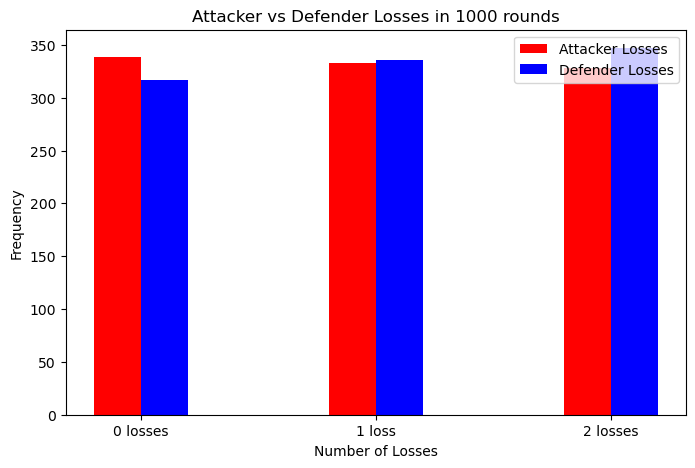

In [10]:
loss_attack_list = np.random.randint(0, 3, 1000)
loss_defend_list = np.random.randint(0, 3, 1000)

# Count occurrences of each loss (0, 1, 2).
attack_counts = np.bincount(loss_attack_list, minlength=3)
defend_counts = np.bincount(loss_defend_list, minlength=3)

# Create side-by-side bar plots.
labels = ['0 losses', '1 loss', '2 losses']
x = np.arange(len(labels))  # label locations.
width = 0.20  # Width of the bars.

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, attack_counts, width, label='Attacker Losses', color='red')
bars2 = ax.bar(x + width/2, defend_counts, width, label='Defender Losses', color='blue')

# Add labels and titles.
ax.set_xlabel('Number of Losses')
ax.set_ylabel('Frequency')
ax.set_title('Attacker vs Defender Losses in 1000 rounds')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add a counter text to display the rounds.
counter_text = ax.text(1.0, 0.95, '', transform=ax.transAxes, ha='center', fontsize=12)

# Function for animation.
def update(frame):
    # Counts based on the current round's results.
    attack_counts[int(loss_attack_list[frame])] += 1
    defend_counts[int(loss_defend_list[frame])] += 1
    
    # Height of each bar.
    for i, bar in enumerate(bars1):
        bar.set_height(attack_counts[i])
    for i, bar in enumerate(bars2):
        bar.set_height(defend_counts[i])
    
    # Update the counter text to show the current round in tenths of a second.
    current_time = frame / 10.0  # each frame is 0.1 seconds
    counter_text.set_text(f'Round: {frame + 1}\nTime: {current_time:.1f}s')

# Create the animation.
ani = FuncAnimation(fig, update, frames=total_rounds, interval=1000, repeat=False, blit = False)

# Show plot.
plt.show()

# End.